## DCTC DCSC feature extraction demo
First I import packages:

In [31]:
import sys
import numpy as np
import matplotlib.pyplot as P
from scipy.io import wavfile
from HTKFeat import MFCC_HTK

## Speech signal waveform and spectrogram

(0, 4)

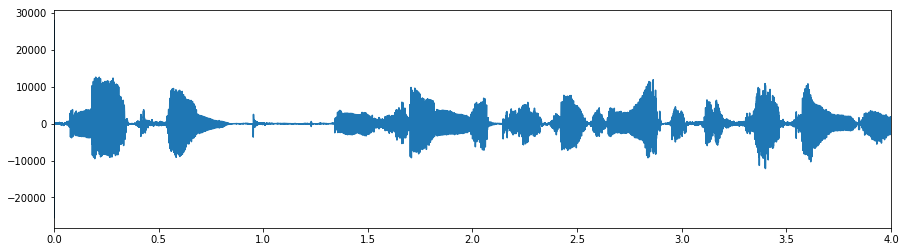

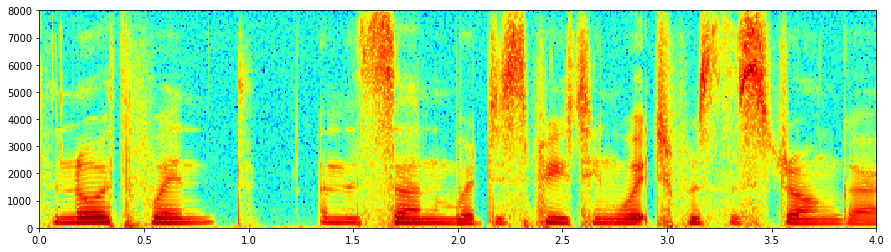

In [46]:

#samplerate, signal = wavfile.read('file.raw') # sample rate is 16000 in this example
samplerate = 16000
mfcc=MFCC_HTK()
signal = mfcc.load_raw_signal('f1nw0000pes_short.wav')
sig_len = signal.size/samplerate # sig_len is in secs
P.figure(figsize = (15,4))
P.xlim(0, int(sig_len))
t = np.linspace(0, sig_len, signal.size)
P.plot(t, signal)
P.figure(figsize=(15,4))
s = P.specgram(signal, Fs = samplerate, cmap = 'jet')
P.xlim(0, int(sig_len))

## DC Removal

In [48]:
signal = signal - np.mean(signal)

## Speech frames

In [52]:
# frame shift and frame length in samples
win_shift = 160
win_len = 400

win_num = np.floor((sig_len-win_len)/win_shift).astype('int')+1

wins = []
for w in range(win_num):
    s = w * win_shift
    e = s + win_len
    win = signal[s:e].copy()
    wins.append(win)
    
wins = np.asarray(wins) # frames of speech

## Pre-emphasis

In [53]:
for win in wins:
    win -= np.hstack((win[0], win[:-1])) * k

## Hamming window

In [54]:
hamm = np.hamming(400) # change to Kaiser？
for win in wins:
    win *= hamm

## FFT

In [55]:
fft_len = np.asscalar(2 ** (np.floor(np.log2(win_len)) + 1).astype('int'))
ffts = []
for win in wins:
    win = np.abs(np.fft.rfft(win, n = fft_len)[:-1])
    ffts.append(win)

ffts = np.asarray(ffts)

## Filtering

In [ ]:
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB
# 怎么应用这个滤波器？